# MNIST DATASET
##### 1) Details About MNIST Dataset :
MNIST dataset stand for (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.It was created by "re-mixing" the samples from NIST's original datasets.   

The MNIST dataset contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.

##### 2) MNIST Dataset Looks Like :

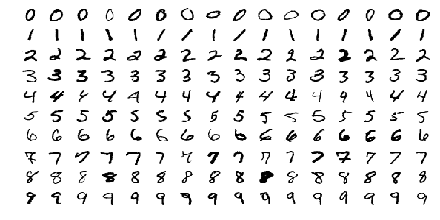

In [136]:
from PIL import Image 
image = Image.open("C:/Users/Daniyal/MNIST.png").resize((440, 220))
image

##### 3) Working On MNIST Dataset:

# Import Libraries
#### Using Tensorflow 2.0

In [137]:
import tensorflow as tf  
import matplotlib.pyplot as plt

# Loading Data 

#### 1) The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.
#### 2) x_train and x_test parts contain greyscale RGB codes (from 0 to 255).
#### 3) y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.

In [138]:
MNIST = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = MNIST.load_data() 

#### Train & Test Shape For X

In [139]:
print("X-Train:", x_train.shape , "\nX-Test: ", x_test.shape)

X-Train: (60000, 28, 28) 
X-Test:  (10000, 28, 28)


#### Train & Test Shape For Y

In [140]:
print("Y-Train:", y_train.shape , "\nY-Test: ", y_test.shape)

Y-Train: (60000,) 
Y-Test:  (10000,)


# Data Preprocessing
1) We have to scale x_train and x_test so that all values are in the [0, 1] interval. It is basicaly used to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.                                                                                                  
2) Goal of scaling is to speed up the algorithm's computation. It is also required for some algorithms to model the data correctly.

In [141]:
x_train, x_test = x_train / 255.0  ,  x_test / 255.0

# Building Neural Network Model

In [142]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compilation

In [143]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training The Model

In [144]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2949 - accuracy: 0.9141
Epoch 2/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1408 - accuracy: 0.9575
Epoch 3/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1043 - accuracy: 0.9681
Epoch 4/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0863 - accuracy: 0.9735
Epoch 5/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0733 - accuracy: 0.9765


# Evaluate The Model

#### Now, checking that the model performs well on the test set:

In [148]:
loss,accuracy = model.evaluate(x_test,  y_test, verbose=2)
print("----------------------")
print('| Accuracy: %.2f' % (accuracy*100),"   |")
print("----------------------")
print("----------------------")
print('| Loss : %.2f' % loss,"       |")
print("----------------------")

10000/1 - 1s - loss: 0.0381 - accuracy: 0.9775
----------------------
| Accuracy: 97.75    |
----------------------
----------------------
| Loss : 0.07        |
----------------------


# Prediction

array([3], dtype=int64)

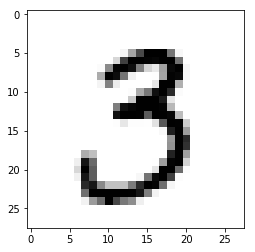

In [146]:
plt.imshow(x_test[90],cmap='Greys')
model.predict_classes(x_test[90].reshape(1, 28, 28 ))